<a href="https://colab.research.google.com/github/human-centered-ai-lab/app-covid-19-playground/blob/master/covid_19_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from datetime import timedelta, date
import matplotlib.pyplot as plt
from scipy import signal
import psycopg2 as ps
import seaborn as sns
import pandas as pd
import numpy  as np
import requests
import math
import json

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

countriesOfInterest = ['Austria', 'Belgium','Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary',  'Italy', 'Malta','Netherlands',  'Portugal', 'Slovakia', 'Slovenia', 'Sweden', 'Switzerland', 'US', 'United Kingdom']
population = {}
for c in countriesOfInterest:
  r = requests.get(url = "https://restcountries.eu/rest/v2/name/" + c) 
  data = r.json() 
  if ( r.status_code == 200):
      population[c] = data[0]['population']
  else:
      population[c] = 999999999999999999999999
population.update ({'Czechia' : 10703551})
population.update ({'US' : 330467650})
print (population)

{'Austria': 8725931, 'Belgium': 11319511, 'Czechia': 10703551, 'Denmark': 5717014, 'Finland': 5491817, 'France': 66710000, 'Germany': 81770900, 'Hungary': 9823000, 'Italy': 60665551, 'Malta': 425384, 'Netherlands': 17019800, 'Portugal': 10374822, 'Slovakia': 5426252, 'Slovenia': 2064188, 'Sweden': 9894888, 'Switzerland': 8341600, 'US': 330467650, 'United Kingdom': 65110000}



# Number of Cases (logarthmic scale) per 1.000.000 inhabitants



Hello


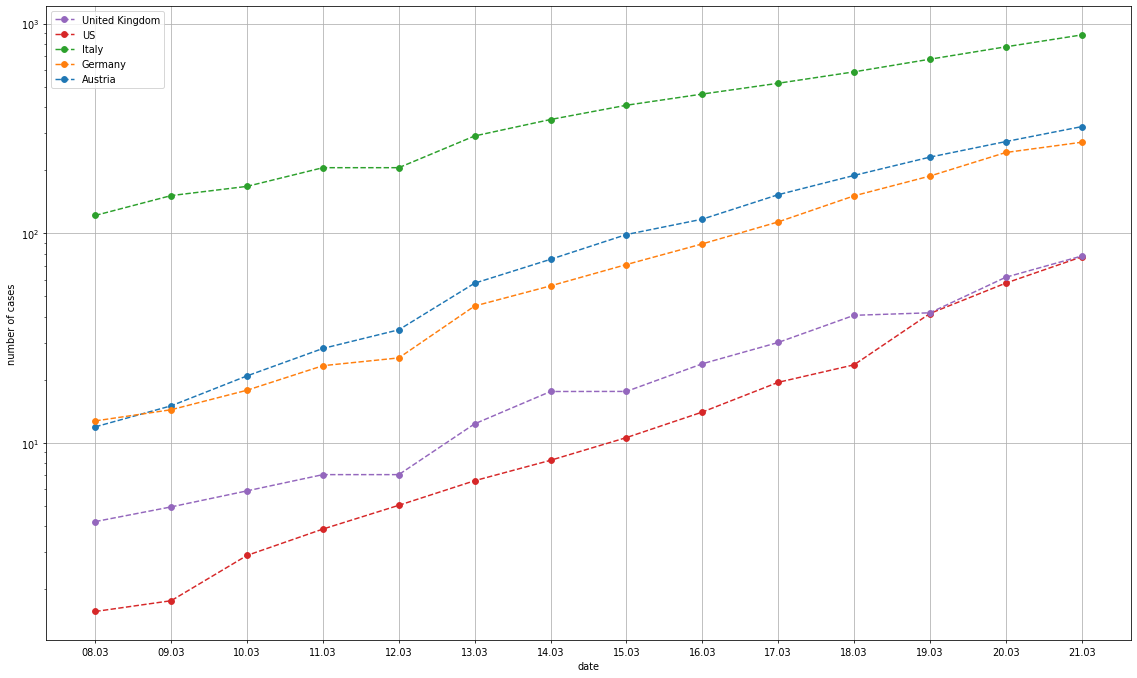

In [49]:
def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0])) # sort both labels and handles by labels
    if order is not None: # Sort according to a given list (not necessarily complete)
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels)
    return(handles, labels)


def unique_everseen(seq, key=None):
    seen = set()
    seen_add = seen.add
    return [x for x,k in zip(seq,key) if not (k in seen or seen_add(k))]

width_in_inches = 20
height_in_inches = 12
dots_per_inch = 70
plt.figure( figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)

countriesOfInterest = ['Austria',  'Germany', 'Italy', 'US', 'United Kingdom' ]



print ("Hello")
r = requests.get(url = "https://pomber.github.io/covid19/timeseries.json") 
data = r.json() 

countries = data.keys()

start_date = date(2020, 3, 8)
end_date   = date(2020, 3, 22)

datesToInspect = []

x_axis_data = [];
for single_date in daterange(start_date, end_date):
    x_axis_data.append(single_date.strftime("%d.%m"))
    datesToInspect.append(single_date.strftime("%Y-%-m-%-d"))

lines = []
labels = []

for c in countriesOfInterest:
  y_axis_data = [];
  for dataindex in datesToInspect:
    datafromonecontry = data[c]
    for daydata in datafromonecontry:
      #print (daydata['date'], dataindex)
      if daydata['date'] == dataindex:
          cc = daydata['confirmed']
          normalizedcc = cc * 1000000 / population[c]
          y_axis_data.append(normalizedcc)
  lines, = plt.plot(x_axis_data,  y_axis_data, label=c, linestyle='--', marker='o')
  labels.append (c)
  plt.legend()

plt.yscale('log')
plt.xlabel("date")
plt.ylabel("number of cases")
plt.grid(True)
#reorderLegend(plt.gca(), 'Top')

handles, labels = plt.gca().get_legend_handles_labels()
order = [4,3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.show()



# **Grow rate**

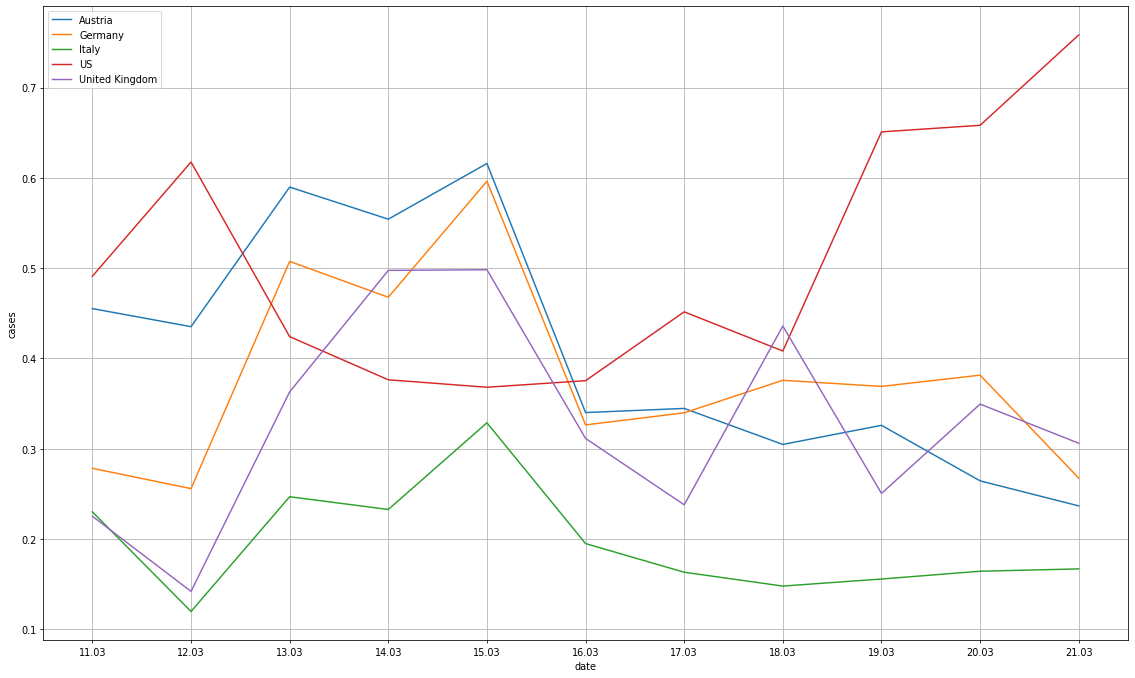

In [38]:

plt.figure( figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
numberOfDays = len(datesToInspect)
offset = 3
for c in countriesOfInterest:
  y_axis_data = [];
  for dataindex in range(numberOfDays-offset):
    datafromonecontry = data[c]
    datastring = datesToInspect[dataindex]
    cc1 = 0
    cc2 = 0
    for daydata in datafromonecontry:
      if daydata['date'] == datastring:
          cc1 = daydata['confirmed']
    datastring = datesToInspect[dataindex+offset]
    for daydata in datafromonecontry:
      if daydata['date'] == datastring:
          cc2 = daydata['confirmed']
    if cc2 == 0:
      v = 0
    else:       
      v = (cc2-cc1) / cc1  / offset
    y_axis_data.append(v)

  y_axis_data_average = moving_average (y_axis_data)

  lines, = plt.plot(x_axis_data[offset:],  y_axis_data, label=c)

  labels.append (c)
  plt.legend()

plt.xlabel("date")
plt.ylabel("cases")
plt.grid(True)
plt.show()
